# Data Literacy Project - Cleaning and Preprocessing


In [83]:
#imports
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Loading all the data from the LEMON Dataset

In [84]:
data_dir = '../Behavioural_Data_MPILMBB_LEMON'  
meta_file = os.path.join(data_dir, "META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")

In [86]:
# Emotion Regulation Tests
emotion_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/ERQ.csv",  # Emotion Regulation Questionnaire
    "Emotion_and_Personality_Test_Battery_LEMON/CERQ.csv"  # Cognitive Emotion Regulation Questionnaire
]

# Behavioral Features
behavioral_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/MSPSS.csv",  # Perceived Social Support
    "Emotion_and_Personality_Test_Battery_LEMON/F-SozU_K-22.csv",  # Social Support Questionnaire
    "Emotion_and_Personality_Test_Battery_LEMON/BISBAS.csv",  # BIS/BAS
    "Emotion_and_Personality_Test_Battery_LEMON/TEIQue-SF.csv"
]

# Personality and Emotional Traits
personality_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/NEO_FFI.csv",  # Personality Inventory
    "Emotion_and_Personality_Test_Battery_LEMON/STAI_G_X2.csv",  # Anxiety Inventory
    "Emotion_and_Personality_Test_Battery_LEMON/TAS.csv",
    "Emotion_and_Personality_Test_Battery_LEMON/STAXI.csv"  # Anger Expression Inventory
]

# Cognitive Tests
cognitive_files = [
    "Cognitive_Test_Battery_LEMON/LPS/LPS.csv",  # LPS
    "Cognitive_Test_Battery_LEMON/TAP_Alertness/TAP-Alertness.csv",  # TAP Alertness
    "Cognitive_Test_Battery_LEMON/TAP_Working_Memory/TAP-Working Memory.csv"  # TAP Working Memory
]

# Medical Data Files
medical_files = [
    "Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv",
    "Medical_LEMON/Blood Pressure/Blood_Pressure_LEMON.csv",
    "Medical_LEMON/Blood Sample/Blood_Results_LEMON.csv",
]

# Combine All Files
all_files = {
    "meta": meta_file,
    "emotion": emotion_files,
    "behavioral": behavioral_files,
    "personality": personality_files,
    "cognitive": cognitive_files,
    "medical": medical_files
}

# Load Metadata
print("Loading Metadata...")
meta = pd.read_csv(all_files["meta"])
meta.rename(columns={meta.columns[0]: "subnumber"}, inplace=True)

# Load and Merge All Datasets
dataframes = []

# Function to Load and Rename First Column to 'subnumber'
def load_and_prepare(file_path):
    df = pd.read_csv(file_path)
    df.rename(columns={df.columns[0]: "subnumber"}, inplace=True)
    return df

# Load Emotion, Behavioral, Personality, Cognitive, and Medical Data
for category, files in all_files.items():
    if category != "meta":
        for file in files:
            file_path = os.path.join(data_dir, file)
            try:
                df = load_and_prepare(file_path)
                dataframes.append(df)
                print(f"Loaded: {file} with shape {df.shape}")
            except Exception as e:
                print(f"Error loading {file}: {e}")

Loading Metadata...
Loaded: Emotion_and_Personality_Test_Battery_LEMON/ERQ.csv with shape (221, 3)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/CERQ.csv with shape (221, 10)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/MSPSS.csv with shape (221, 5)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/F-SozU_K-22.csv with shape (221, 6)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/BISBAS.csv with shape (221, 5)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/TEIQue-SF.csv with shape (221, 6)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/NEO_FFI.csv with shape (221, 6)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/STAI_G_X2.csv with shape (221, 2)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/TAS.csv with shape (221, 5)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/STAXI.csv with shape (221, 8)
Loaded: Cognitive_Test_Battery_LEMON/LPS/LPS.csv with shape (228, 3)
Loaded: Cognitive_Test_Battery_LEMON/TAP_Alertness/TAP-Alertness.csv with shape (228, 18

In [87]:
df.head()

,subnumber,Date_Blood_Drawing_LabAnalysis,ALAT_in_ µkat_l,ALAT_Reference_range,ASAT_in_µkat_l,ASAT_Reference_range,HCT _in_l_l,HCT_Reference range,HGB_in_mmol_l,HGB_Reference range,...,NA_in_mmol_l,NA_Reference range,PT_in_%,PT_Reference range,PTR,PTS_in_sec,TRIG_in_mmol_l,TRIG_Reference range,TSH_in_mU_l,TSH_Reference range
0,sub-032311,DAY1+0,0.28,0.17 - 0.85,0.38,0.17 - 0.85,0.445,0.4 - 0.53,9.4,8.4 - 10.9,...,138.7,135 - 145,108.0,> 70,NaN,NaN,1.79,< 1.7,1.48,0.4 - 3.77
1,sub-032309,DAY1+0,0.24,0.17 - 0.85,0.30,0.17 - 0.85,0.386,0.4 - 0.53,7.9,8.4 - 10.9,...,140.1,135 - 145,114.0,> 70,1.03,11.7,0.80,< 2.26,1.65,0.4 - 3.77
2,sub-032382,DAY1+0,1.10,0.17 - 0.85,0.47,0.17 - 0.85,0.441,0.4 - 0.53,9.6,8.4 - 10.9,...,136.6,135 - 145,96.0,> 70,0.97,11.1,2.60,< 2.26,1.31,0.4 - 3.77
3,sub-032302,DAY1+0,0.22,0.17 - 0.58,0.27,0.17 - 0.6,0.352,0.36 - 0.48,7.2,7.5 - 9.9,...,140.1,135 - 145,101.0,> 70,0.94,10.7,1.88,< 2.26,2.67,0.4 - 3.77
4,sub-032315,DAY1+0,0.31,0.17 - 0.85,0.31,0.17 - 0.85,0.465,0.4 - 0.53,9.8,8.4 - 10.9,...,136.2,135 - 145,89.0,> 70,1.03,11.7,1.90,< 2.26,1.75,0.4 - 3.77


In [88]:
# Merge All DataFrames
merged_data = meta.copy()

for i, df in enumerate(dataframes):
    if "subnumber" not in df.columns:
        print(f"Skipping file {i+1}: Missing 'subnumber' column.")
        continue
    
    try:
        merged_data = pd.merge(merged_data, df, on="subnumber", how="inner")
        print(f"Merged DataFrame {i+1} successfully.")
    except Exception as e:
        print(f"Error merging DataFrame {i+1}: {e}")

# Remove Duplicate Columns if Any
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Save Merged Data to CSV
output_path = os.path.join(data_dir, "final_merged_dataset.csv")
merged_data.to_csv(output_path, index=False)
print(f"Final Merged Data Saved at: {output_path}")

Merged DataFrame 1 successfully.
Merged DataFrame 2 successfully.
Merged DataFrame 3 successfully.
Merged DataFrame 4 successfully.
Merged DataFrame 5 successfully.
Merged DataFrame 6 successfully.
Merged DataFrame 7 successfully.
Merged DataFrame 8 successfully.
Merged DataFrame 9 successfully.
Merged DataFrame 10 successfully.
Merged DataFrame 11 successfully.
Merged DataFrame 12 successfully.
Merged DataFrame 13 successfully.
Merged DataFrame 14 successfully.
Merged DataFrame 15 successfully.
Merged DataFrame 16 successfully.
Final Merged Data Saved at: ../Behavioural_Data_MPILMBB_LEMON/final_merged_dataset.csv


In [89]:
# Data Cleaning
missing_threshold = 0.3
missing_percent = merged_data.isnull().mean()
columns_to_drop = missing_percent[missing_percent > missing_threshold].index

# Drop Columns and Handle Missing Data
merged_data_clean = merged_data.drop(columns=columns_to_drop)

# Impute Missing Values
for col in merged_data_clean.columns:
    if merged_data_clean[col].dtype == 'object':
        merged_data_clean[col].fillna(merged_data_clean[col].mode()[0], inplace=True)
    else:
        merged_data_clean[col].fillna(merged_data_clean[col].median(), inplace=True)
        
# Ensure 'Relationship_Status' Is Uppercase
if "Relationship_Status" in merged_data_clean.columns:
    merged_data_clean["Relationship_Status"] = merged_data_clean["Relationship_Status"].str.upper()

# Check Remaining Missing Values
print("Remaining Missing Values After Cleaning:")
merged_data_clean.isnull().sum().sort_values(ascending=False)
merged_data_clean.head()

Remaining Missing Values After Cleaning:


,subnumber,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",SKID_Diagnoses,...,LDLC_in_mmol_l,LDLC_Reference range,NA_in_mmol_l,NA_Reference range,PT_in_%,PT_Reference range,TRIG_in_mmol_l,TRIG_Reference range,TSH_in_mU_l,TSH_Reference range
0,sub-032311,2,20-25,right,Gymnasium,negative,0.0,non-smoker,1.0,none,...,3.66,< 4.2,138.7,135 - 145,108.0,> 70,1.79,< 1.7,1.48,0.4 - 3.77
1,sub-032309,2,20-25,right,Gymnasium,negative,0.0,occasional smoker,2.0,none,...,2.31,< 4.2,140.1,135 - 145,114.0,> 70,0.80,< 2.26,1.65,0.4 - 3.77
2,sub-032382,2,25-30,right,Gymnasium,negative,0.0,occasional smoker,2.0,none,...,3.94,< 4.2,136.6,135 - 145,96.0,> 70,2.60,< 2.26,1.31,0.4 - 3.77
3,sub-032302,1,20-25,right,Gymnasium,negative,0.0,non-smoker,1.0,none,...,3.37,< 4.2,140.1,135 - 145,101.0,> 70,1.88,< 2.26,2.67,0.4 - 3.77
4,sub-032315,2,20-25,right,Gymnasium,negative,0.0,non-smoker,1.0,none,...,2.81,< 4.2,136.2,135 - 145,89.0,> 70,1.90,< 2.26,1.75,0.4 - 3.77


In [90]:
from sklearn.preprocessing import LabelEncoder

# Automatically Detect Categorical Columns (Excluding 'Age')
categorical_cols = merged_data_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove("Age") if "Age" in categorical_cols else None

# Initialize Label Encoders Dictionary
label_encoders = {}

# Encode Categorical Variables
for col in categorical_cols:
    if col in merged_data_clean.columns:
        le = LabelEncoder()
        merged_data_clean[col] = le.fit_transform(merged_data_clean[col].astype(str))
        label_encoders[col] = le

# Reclassify Age Column Based on Median Age Group
if "Age" in merged_data_clean.columns:
    age_mapping = {
        "20-25": 0, 
        "25-30": 0, 
        "30-35": 0, 
        "35-40": 0, 
        "40-45": 0, 
        "45-55": 1, 
        "55-60": 1, 
        "60-65": 1, 
        "65-70": 1,
        "70-75": 1,
        "75-80": 1,
    }
    merged_data_clean["Age_Group"] = merged_data_clean["Age"].map(age_mapping)

# Check and Handle Missing Values in Age_Group
if "Age_Group" in merged_data_clean.columns:
    median_age_group = merged_data_clean["Age_Group"].median()
    merged_data_clean["Age_Group"].fillna(median_age_group, inplace=True)

print("Categorical Variables and Age Group Encoded.")
merged_data_clean.head()

Categorical Variables and Age Group Encoded.


,subnumber,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",SKID_Diagnoses,...,LDLC_Reference range,NA_in_mmol_l,NA_Reference range,PT_in_%,PT_Reference range,TRIG_in_mmol_l,TRIG_Reference range,TSH_in_mU_l,TSH_Reference range,Age_Group
0,10,2,20-25,3,1,1,0.0,0,1.0,14,...,0,138.7,0,108.0,0,1.79,0,1.48,1,0
1,8,2,20-25,3,1,1,0.0,1,2.0,14,...,0,140.1,0,114.0,0,0.80,1,1.65,1,0
2,81,2,25-30,3,1,1,0.0,1,2.0,14,...,0,136.6,0,96.0,0,2.60,1,1.31,1,0
3,1,1,20-25,3,1,1,0.0,0,1.0,14,...,0,140.1,0,101.0,0,1.88,1,2.67,1,0
4,14,2,20-25,3,1,1,0.0,0,1.0,14,...,0,136.2,0,89.0,0,1.90,1,1.75,1,0


In [91]:
print(merged_data_clean.groupby("Age").count())

       subnumber  Gender_ 1=female_2=male  Handedness  Education  DRUG  \
Age                                                                      
20-25         75                       75          75         75    75   
25-30         67                       67          67         67    67   
30-35         12                       12          12         12    12   
35-40          1                        1           1          1     1   
55-60          4                        4           4          4     4   
60-65         19                       19          19         19    19   
65-70         25                       25          25         25    25   
70-75         20                       20          20         20    20   
75-80          4                        4           4          4     4   

       DRUG_0=negative_1=Positive  Smoking  \
Age                                          
20-25                          75       75   
25-30                          67       67   
3

In [94]:
# Feature Engineering with Medical and Specific Data Fix

# Ensure Safe Numeric Conversion Function
def safe_numeric_conversion(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Define Relevant Feature Categories
# Specific Features
lps_cols = ["LPS_1"]  # Only LPS_1 is relevant
tap_wm_cols = ["TAP_WM_1", "TAP_WM_6"]  # Only TAP_WM_1 and TAP_WM_6
cerq_cols = [col for col in merged_data_clean.columns if "CERQ" in col]  # All CERQ columns
erq_cols = [col for col in merged_data_clean.columns if "ERQ" in col]  # Both ERQ columns

# Social Support (MSPSS)
social_support_cols = [
    "MSPSS_Friends",
    "MSPSS_Family",
    "MSPSS_SignificantOthers"
]

# Personality Traits (NEO)
neo_cols = [
    "NEOFFI_Neuroticism",
    "NEOFFI_Extraversion",
    "NEOFFI_OpennessForExperiences",
    "NEOFFI_Agreeableness",
    "NEOFFI_Conscientiousness"
]

# Emotional Intelligence (TeiQueSF)
tei_cols = [
    "TeiQueSF_self_control",
    "TeiQueSF_emotionality",
    "TeiQueSF_sociability",
    "TeiQueSF_well_being"
]

# Anxiety (STAI)
stai_cols = ["STAI_Trait_Anxiety"]

# Alexithymia (TAS)
tas_cols = ["TAS_OverallScore"]

# Medical Data
anthropometry_cols = [col for col in merged_data_clean.columns if "Anthropometry" in col]
bp_cols = [col for col in merged_data_clean.columns if "BP" in col]
blood_sample_cols = [col for col in merged_data_clean.columns if "Blood_Sample" in col]

# Combine All Relevant Features
all_cols = lps_cols + tap_wm_cols + cerq_cols + erq_cols + \
           social_support_cols + neo_cols + tei_cols + stai_cols + tas_cols + \
           anthropometry_cols + bp_cols + blood_sample_cols

# Convert Relevant Columns to Numeric
merged_data_clean = safe_numeric_conversion(merged_data_clean, all_cols)

# Medical Aggregates
if anthropometry_cols:
    merged_data_clean["Anthropometry_Sum"] = merged_data_clean[anthropometry_cols].sum(axis=1)
if bp_cols:
    merged_data_clean["BloodPressure_Mean"] = merged_data_clean[bp_cols].mean(axis=1)
if blood_sample_cols:
    merged_data_clean["BloodSample_Sum"] = merged_data_clean[blood_sample_cols].sum(axis=1)

# Convert Age to Numeric Safely
if "Age" in merged_data_clean.columns:
    merged_data_clean["Age_Numeric"] = merged_data_clean["Age"].astype(str).str.extract(r'(\d+)').astype(float)

# Check if Features Were Added
selected_features = lps_cols + tap_wm_cols + cerq_cols + erq_cols + \
                    social_support_cols + neo_cols + tei_cols + stai_cols + tas_cols + \
                    ["Anthropometry_Sum", "BloodPressure_Mean", "BloodSample_Sum", "Age_Numeric"]

existing_selected_features = [feat for feat in selected_features if feat in merged_data_clean.columns]

if existing_selected_features:
    print("Feature Engineering Completed.")
    display(merged_data_clean[existing_selected_features].head(20))
else:
    print("No Selected Features Were Created.")




# # Display the Newly Engineered Features
# new_features = [
#     "CERQ_Sum", "ERQ_Sum", "MSPSS_Sum", "FSoZu_Sum", "BISBAS_Total",
#     "NEO_Sum", "STAI_Sum", "STAXI_Sum", "CVLT_Sum", "CVLT_Mean", 
#     "TAP_Sum", "Anthropometry_Sum", "BloodPressure_Mean", 
#     "BloodSample_Sum", "Age_Numeric"
# ]

# # Check if Features Were Created
# existing_new_features = [feat for feat in new_features if feat in merged_data_clean.columns]

# if existing_new_features:
#     print("Feature Engineering Completed.")
#     display(merged_data_clean[existing_new_features].head(20))
# else:
#     print("No New Features Were Created.")

Feature Engineering Completed.


/var/folders/7l/wr39ns_13xdbtxc49y6l0qjh0000gn/T/ipykernel_86968/2820756355.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_data_clean["BloodPressure_Mean"] = merged_data_clean[bp_cols].mean(axis=1)
/var/folders/7l/wr39ns_13xdbtxc49y6l0qjh0000gn/T/ipykernel_86968/2820756355.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_data_clean["Age_Numeric"] = merged_data_clean["Age"].astype(str).str.extract(r'(\d+)').astype(float)


,LPS_1,TAP_WM_1,TAP_WM_6,CERQ_SelfBlame,CERQ_Acceptance,CERQ_Rumination,CERQ_positiveRefocusing,CERQ_RefocusOnPlanning,CERQ_PositiveReappraisal,CERQ_PuttingIntoPerspective,...,NEOFFI_Agreeableness,NEOFFI_Conscientiousness,TeiQueSF_self_control,TeiQueSF_emotionality,TeiQueSF_sociability,TeiQueSF_well_being,STAI_Trait_Anxiety,TAS_OverallScore,BloodPressure_Mean,Age_Numeric
0,27,613.0,15,7,5,6,3,4,6,5,...,2.750000,1.583333,4.333333,4.875,5.000000,4.666667,38,59,100.500,20.0
1,24,693.0,13,5,8,5,4,3,2,2,...,2.833333,1.333333,4.000000,3.500,2.833333,3.166667,46,53,102.500,20.0
2,25,551.0,15,6,8,4,4,11,5,6,...,2.000000,2.833333,5.833333,5.125,5.500000,3.500000,54,39,114.750,25.0
3,17,705.0,14,6,5,4,7,10,8,8,...,3.083333,2.416667,4.500000,5.000,4.333333,4.666667,49,45,94.500,20.0
4,20,509.0,8,5,10,5,3,4,10,6,...,2.250000,1.500000,5.166667,2.750,4.666667,5.333333,41,51,109.500,20.0
5,26,605.0,15,7,9,8,3,12,3,8,...,2.666667,2.666667,4.333333,5.000,3.666667,4.000000,42,47,97.875,25.0
6,24,491.0,15,9,6,2,0,12,10,11,...,3.000000,3.000000,4.833333,4.250,4.500000,5.833333,37,64,94.875,25.0
7,21,555.0,14,12,9,7,1,9,1,1,...,2.666667,2.000000,4.000000,4.000,2.333333,4.500000,52,54,152.625,60.0
8,21,471.0,14,7,9,3,5,4,6,9,...,2.333333,2.250000,3.666667,3.375,3.333333,4.666667,46,57,92.750,25.0
9,21,525.0,15,6,6,7,3,12,5,1,...,3.000000,3.583333,5.500000,6.125,5.833333,6.333333,30,27,98.375,25.0


In [95]:
# Save Cleaned and Preprocessed Data
output_path_clean = os.path.join(data_dir, "cleaned_processed_data.csv")
merged_data_clean.to_csv(output_path_clean, index=False)

print(f"Cleaned and Processed Data Saved at: {output_path_clean}")


Cleaned and Processed Data Saved at: ../Behavioural_Data_MPILMBB_LEMON/cleaned_processed_data.csv


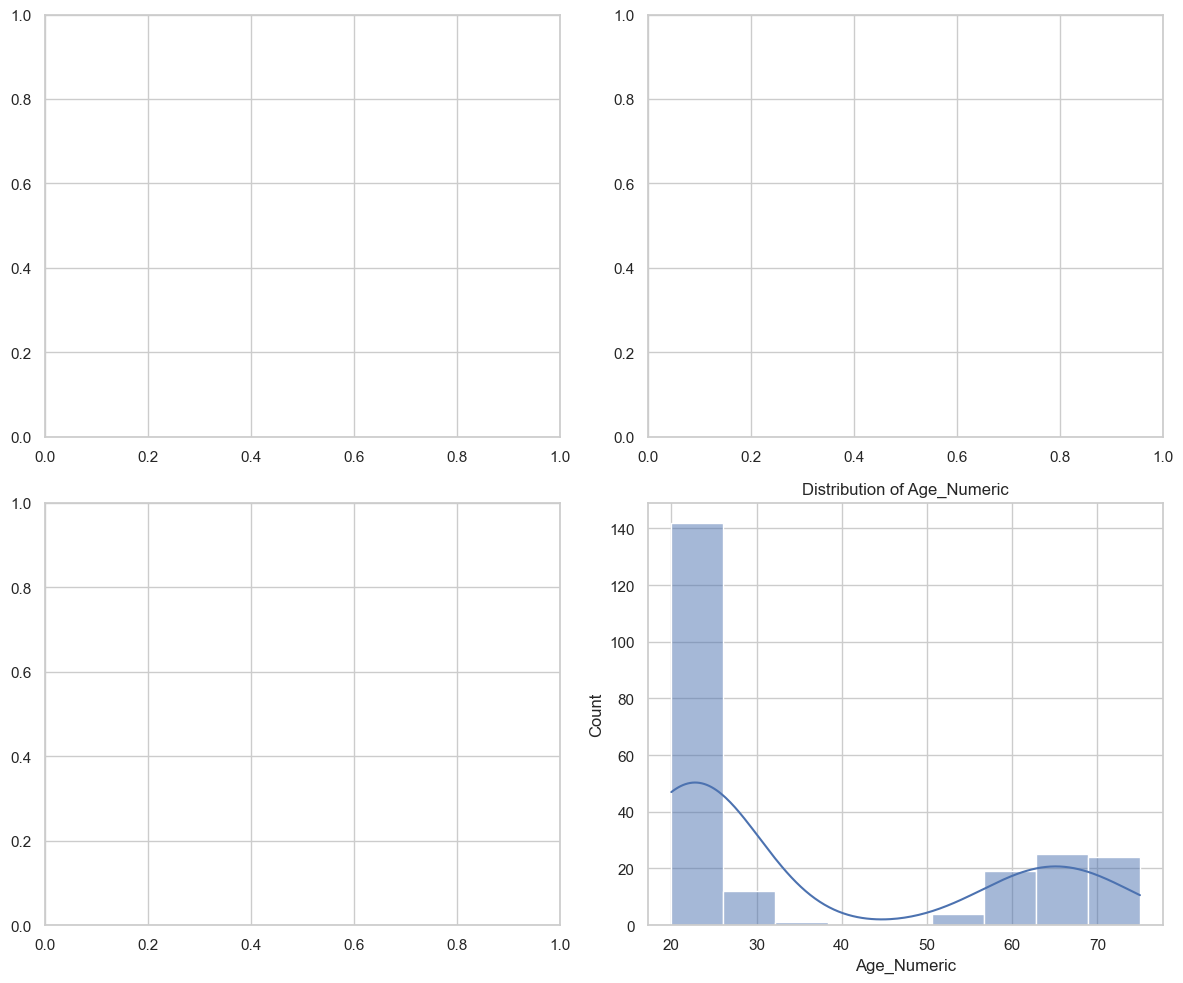

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn Style
sns.set(style="whitegrid")

# Plot Distributions of Key Features
key_features = {
    "LPS": "CVLT (Verbal Learning)",
    "ERQ_Sum": "ERQ (Emotional Regulation)",
    "BISBAS_Total": "BISBAS (Behavioral Activation/Inhibition)",
    "Age_Numeric": "Age (Numeric)"
}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, feature in zip(axes.flatten(), key_features):
    if feature in merged_data_clean.columns:
        sns.histplot(merged_data_clean[feature], kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


### Distribution of Key Features

- **CVLT_Sum (California Verbal Learning Test):**  
  This test measures verbal learning and memory performance. A normal distribution is observed, with most scores clustering around 200–220. This suggests a typical cognitive performance in verbal learning across participants.

- **ERQ_Sum (Emotion Regulation Questionnaire):**  
  The ERQ assesses emotional regulation strategies, specifically *cognitive reappraisal* and *expressive suppression*. The distribution skews slightly right, with most scores between 50 and 70, indicating varying levels of emotional regulation among participants.

- **BISBAS_Total (Behavioral Inhibition and Activation System):**  
  The BIS/BAS scale measures motivational tendencies—BIS (inhibition for punishment) and BAS (activation for rewards). The distribution shows two peaks, suggesting the presence of distinct behavioral motivation patterns in the sample.

- **Age_Numeric:**  
  The age distribution is highly skewed, with most participants between 20–30 years old, and a smaller group in the 60–70 age range. This uneven age distribution will likely influence the `Relationship_Status`.

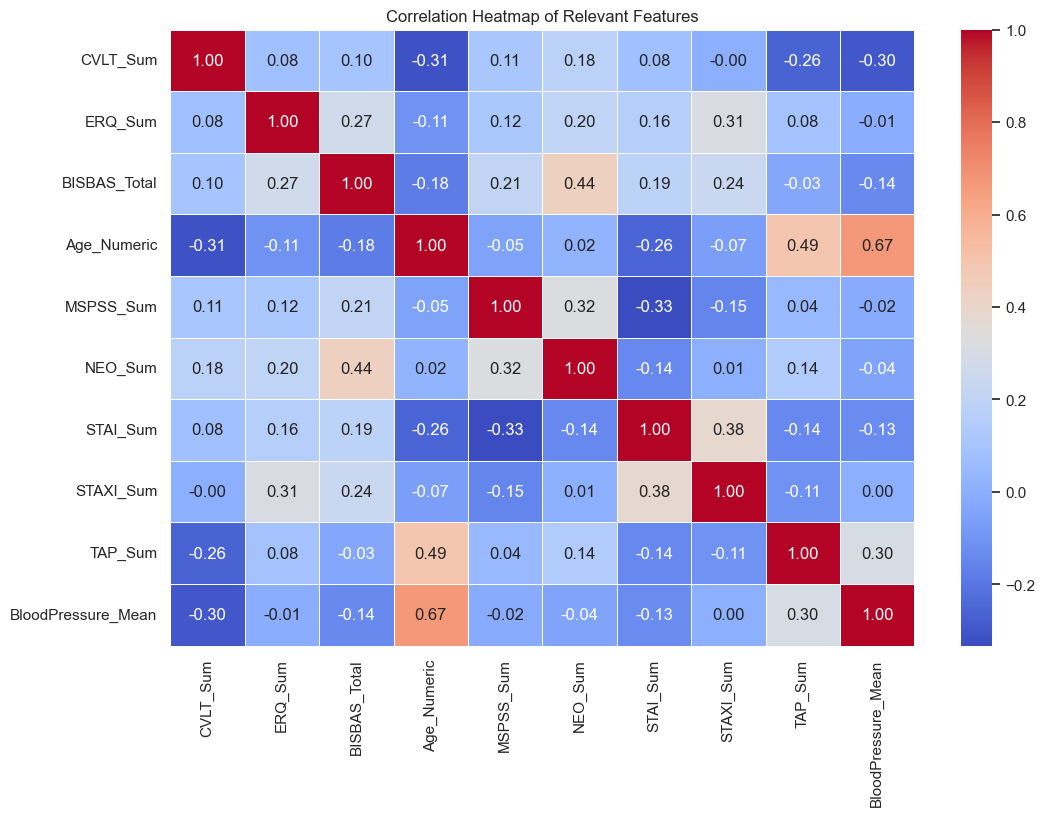

In [22]:
# Relevant Features for Correlation
relevant_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", 
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", 
    "Anthropometry_Sum", "BloodPressure_Mean", "BloodSample_Sum"
]

# Filter Existing Features
existing_features = [feat for feat in relevant_features if feat in merged_data_clean.columns]

# Plot Correlation Heatmap
correlation_matrix = merged_data_clean[existing_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Relevant Features")
plt.show()

### Correlation Heatmap of Relevant Features

- **Purpose of the Heatmap:**  
  This heatmap visualizes the pairwise correlations between key features, which include cognitive, emotional, behavioral, and medical data. These correlations help us understand how different variables interact and which features might be most relevant in predicting the likelihood of being in a relationship.

- **Key Observations:**
  1. **`Age_Numeric` and `BloodPressure_Mean` (0.67):**  
     - Older participants tend to have higher blood pressure, a well-documented physiological trend. This strong correlation highlights the role of age in understanding participants' overall health and life stage, both of which may indirectly influence relationship status.

  2. **`Age_Numeric` and `TAP_Sum` (0.49):**  
     - Older participants tend to score higher on attentional performance (TAP). This might reflect better cognitive focus or experience in completing tasks, which could relate to maturity and readiness for long-term relationships.

  3. **`NEO_Sum` and `BISBAS_Total` (0.44):**  
     - Personality traits such as extraversion, openness, and conscientiousness (NEO) are moderately correlated with behavioral tendencies like reward sensitivity (BIS/BAS). This connection could suggest that individuals with specific personality traits may also exhibit behaviors that influence their likelihood of forming relationships.

  4. **`STAI_Sum` and `MSPSS_Sum` (-0.33):**  
     - Anxiety (STAI) negatively correlates with perceived social support (MSPSS). This indicates that participants with high levels of anxiety may perceive or experience less social support, potentially affecting their ability to form or maintain relationships.

  5. **`CVLT_Sum` and `STAI_Sum` (-0.26):**  
     - Verbal learning and memory (CVLT) scores negatively correlate with anxiety. Participants with higher anxiety might struggle with memory recall, which could indirectly influence their social interactions or emotional expression in relationships.

- **Interpretation of Test Scores:**
  - **`CVLT_Sum (California Verbal Learning Task):`**  
    Measures memory recall and learning. High scores indicate strong verbal memory, which might aid in effective communication—a key element in relationships.
  - **`ERQ_Sum (Emotion Regulation Questionnaire):`**  
    Assesses emotional regulation strategies. Participants with higher scores in reappraisal (positive regulation) may navigate emotional challenges in relationships more effectively.
  - **`BISBAS_Total (Behavioral Inhibition and Activation Scales):`**  
    Reflects reward-seeking and punishment-avoidance tendencies. Individuals with high BAS scores might actively pursue social or romantic opportunities.
  - **`MSPSS_Sum (Multidimensional Scale of Perceived Social Support):`**  
    Gauges perceived social support, which can enhance emotional well-being and relationship satisfaction. High scores are indicative of robust support networks.
  - **`NEO_Sum (NEO Five-Factor Inventory):`**  
    Captures personality traits like extraversion and agreeableness, which often correlate with relationship stability and success.
  - **`STAI_Sum (State-Trait Anxiety Inventory):`**  
    Indicates anxiety levels. High anxiety can hinder relationship formation due to emotional instability or social avoidance.
  - **`STAXI_Sum (State-Trait Anger Expression Inventory):`**  
    Measures anger regulation. Poor anger management might negatively affect interpersonal relationships.
  - **`TAP_Sum (Test of Attentional Performance):`**  
    Evaluates sustained attention and working memory. High scores suggest better cognitive control, potentially supporting conflict resolution in relationships.
  - **Medical Features:**  
    - **`BloodPressure_Mean:`** May indicate overall health, which can affect confidence, energy, and engagement in relationships.
    - **`Anthropometry_Sum:`** Represents physical attributes (height, weight, etc.). Physical health could influence self-esteem or perceived attractiveness.
    - **`BloodSample_Sum:`** Reflects health biomarkers. Abnormal readings might correlate with stress levels or energy, indirectly affecting relationship dynamics.

- **What This Means for Relationship Prediction:**  
  - The heatmap shows that some features, such as `Age_Numeric`, `BISBAS_Total`, `MSPSS_Sum`, and `NEO_Sum`, have moderate correlations with each other or medical features, suggesting they could play an indirect or combined role in predicting relationship status.
  - Features like anxiety (`STAI_Sum`) and social support (`MSPSS_Sum`) seem inversely related, indicating potential emotional barriers or facilitators to relationships.
  - Medical features like `BloodPressure_Mean` are strongly tied to age and may serve as proxies for life stage rather than direct predictors of relationship status.



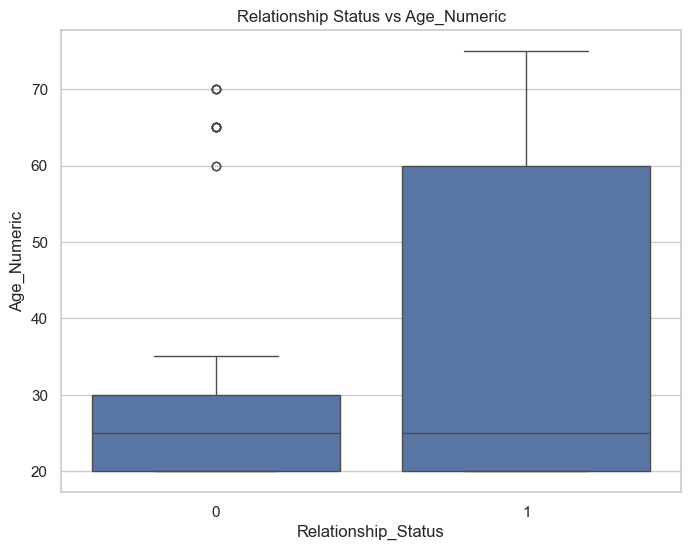

In [97]:
# Boxplots for Key Features by Relationship Status
boxplot_features = ["CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", "MSPSS_Sum", "NEO_Sum"]

for feature in boxplot_features:
    if feature in merged_data_clean.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=merged_data_clean, x="Relationship_Status", y=feature)
        plt.title(f"Relationship Status vs {feature}")
        plt.show()

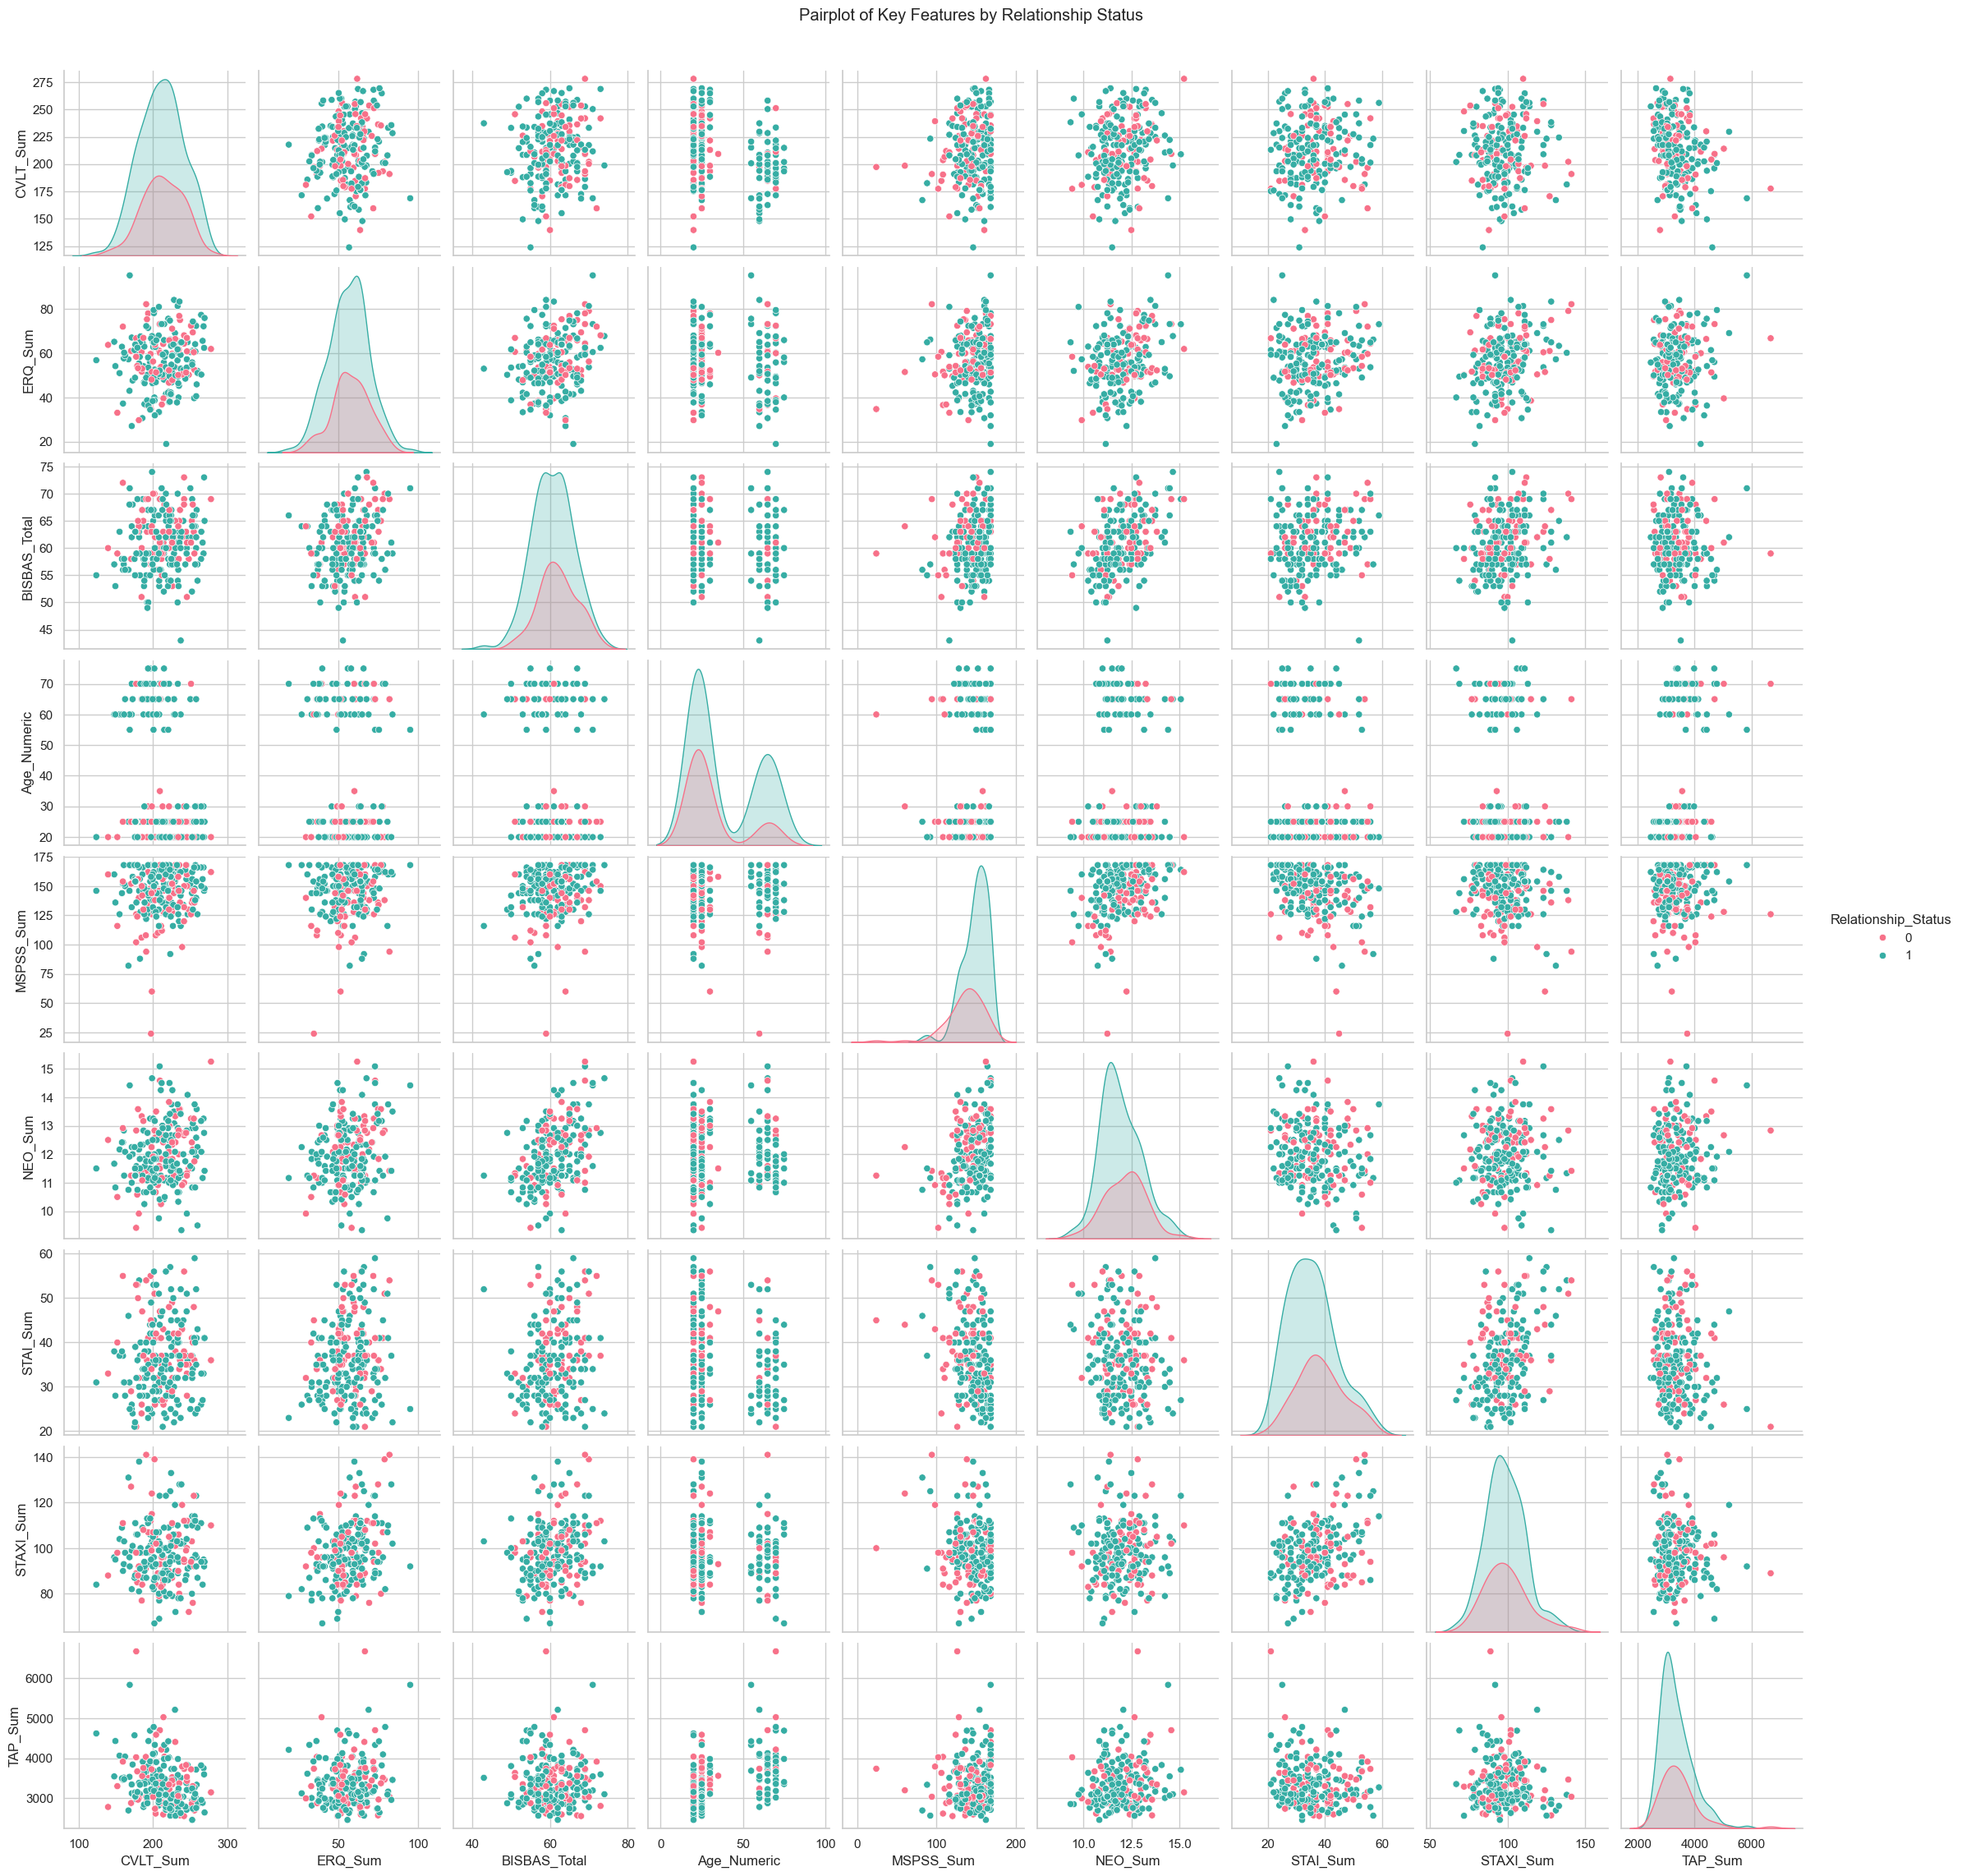

In [24]:
# Pairplot for Key Features by Relationship Status
pairplot_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", 
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", 
    "Relationship_Status"
]

sns.pairplot(
    merged_data_clean[pairplot_features], 
    hue="Relationship_Status", 
    palette="husl"
)
plt.suptitle("Pairplot of Key Features by Relationship Status", y=1.02)
plt.show()

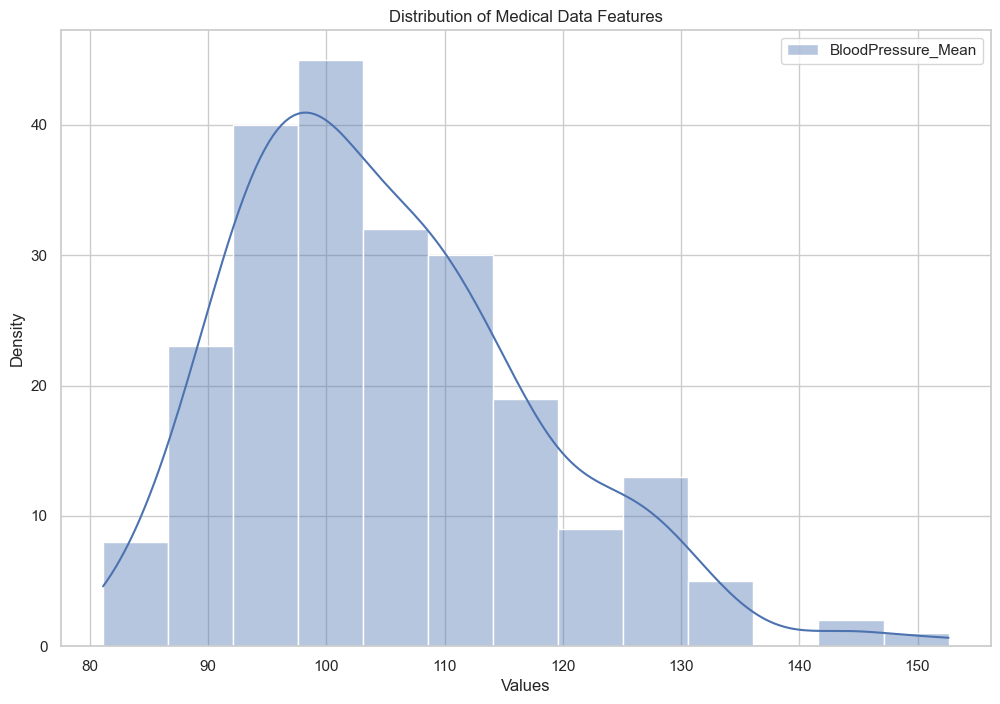

In [25]:
# Medical Data Visualization
medical_features = ["BloodPressure_Mean", "BloodSample_Sum", "Anthropometry_Sum"]
plt.figure(figsize=(12, 8))
for feature in medical_features:
    if feature in merged_data_clean.columns:
        sns.histplot(merged_data_clean[feature], kde=True, label=feature, fill=True, alpha=0.4)

plt.title("Distribution of Medical Data Features")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()

# Age Group specific Comparison & Analyis

In the previous section, we already analyzed our data in total which consists of two groups. One group with younger people in the range from 18 to 45 and older people from 45 to 80 years old. In the correlation matrix we could already visualize, that there is a strong correlation between Blood pressure and age which is also scientifically proven. Starting from there we want to analyze and compare both groups with eachother too see wether variables behave differently within both groups. Ultimately we want to discover if we should choose two different models for both age groups or one is performant enough.  

In [26]:
#split our dataset into old and young
merged_data_clean_young = merged_data_clean[merged_data_clean["Age_Group"] == 0]
merged_data_clean_old = merged_data_clean[merged_data_clean["Age_Group"] == 1]

print(merged_data_clean_young.shape)
print(merged_data_clean_old.shape)

(155, 191)
(72, 191)


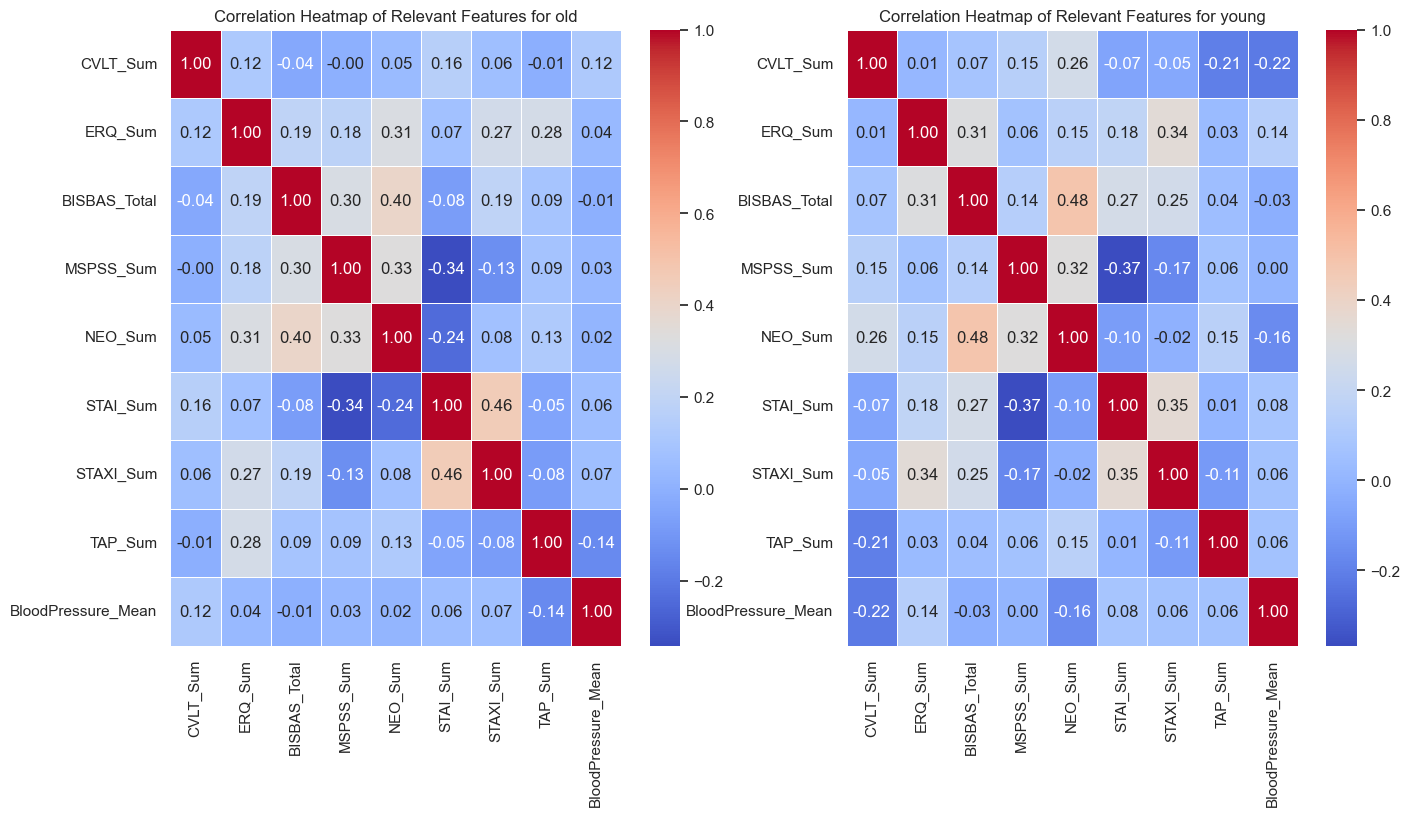

In [27]:
# Relevant Features for Correlation
relevant_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total",
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", "BloodPressure_Mean",
]

# Filter Existing Features
data_relevant_features_old = merged_data_clean_old[relevant_features]
data_relevant_features_young = merged_data_clean_young[relevant_features]

# Plot Correlation Heatmap
correlation_matrix_old = data_relevant_features_old.corr()
correlation_matrix_young = data_relevant_features_young .corr()

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix_old, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Relevant Features for old")

plt.subplot(1,2,2)
sns.heatmap(correlation_matrix_young, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Relevant Features for young")
plt.show()

The direction of the correlation between variables in the two Datasets for old and young groups are mostly identical. In some cases the strength differs, whereas the overall pattern stays the same, with higher positiv correlation between: Neo_sum and BISBAS_TOTAL, STAI_Sum and STAXI_Sum and higher negative correlation between: MSPSS_Sum and STAI_SUM. Those values are always more extreme, higher for positiv and lower for negative correlation, for the young group. This could be because of the imbalance in number of observation. The Dataset has 155, wheras the Dataset old has only 72.

To furhter analyze the difference of the variables among the groups we take a deeper look into the distributions of the variables per group, to identify large differences in values.

In [28]:
#Description of relevant features for young and old people

description_old = data_relevant_features_old.describe()
print("Older Group Statistics:\n", description_old)


Older Group Statistics:
          CVLT_Sum    ERQ_Sum  BISBAS_Total   MSPSS_Sum    NEO_Sum   STAI_Sum  \
count   72.000000  72.000000     72.000000   72.000000  72.000000  72.000000   
mean   197.751333  54.954861     59.750000  143.527778  12.069444  33.138889   
std     23.308179  15.036223      5.825515   22.058802   1.004197   7.786419   
min    147.924000  19.000000     43.000000   24.000000  10.666667  21.000000   
25%    186.225750  42.791667     56.000000  135.000000  11.250000  27.750000   
50%    198.644000  53.833333     59.000000  146.000000  11.916667  31.500000   
75%    209.655000  65.354167     63.000000  158.000000  12.541667  37.250000   
max    258.127000  95.166667     74.000000  168.000000  15.083333  54.000000   

        STAXI_Sum      TAP_Sum  BloodPressure_Mean  
count   72.000000    72.000000           72.000000  
mean    97.347222  3788.239086          117.569444  
std     12.168025   675.053633           11.357679  
min     67.000000  2782.970000           8

In [29]:
description_young = data_relevant_features_young.describe()
print("Young Group Statistics:\n", description_young)

Young Group Statistics:
          CVLT_Sum     ERQ_Sum  BISBAS_Total   MSPSS_Sum     NEO_Sum  \
count  155.000000  155.000000    155.000000  155.000000  155.000000   
mean   218.482019   57.722043     61.729032  145.380645   11.989785   
std     28.927314   10.609613      4.714319   18.973074    1.094858   
min    123.780000   29.750000     50.000000   60.000000    9.333333   
25%    200.237500   50.708333     58.500000  135.000000   11.250000   
50%    222.218000   58.833333     62.000000  150.000000   11.916667   
75%    237.755000   64.125000     65.000000  160.000000   12.750000   
max    278.086000   83.333333     73.000000  168.000000   15.250000   

         STAI_Sum   STAXI_Sum      TAP_Sum  BloodPressure_Mean  
count  155.000000  155.000000   155.000000          155.000000  
mean    37.909677   99.193548  3183.572148           99.088710  
std      8.452593   13.405318   421.174007            7.882186  
min     21.000000   72.000000  2459.073000           81.125000  
25%     32

The statistics for the older group reveal that most features, such as CVLT_Sum, ERQ_Sum, BISBAS_Total, and NEO_Sum, have relatively symmetric distributions, as indicated by similar means and medians. However, features like TAP_Sum and BloodPressure_Mean show higher variability and wide ranges, suggesting potential outliers. For instance, TAP_Sum ranges from 5565.94 to 13353.71, with a standard deviation of 1350.1, indicating significant heterogeneity. Similarly, BloodPressure_Mean spans 88.63 to 152.63, reflecting diverse health profiles.

Features with smaller variability, such as NEO_Sum (std: 2.00), show consistency across participants. Psychological measures like STAI_Sum and STAXI_Sum exhibit moderate variability, making them reliable for analysis. Outlier treatment and feature scaling may be necessary, especially for highly variable features, to ensure balanced modeling. 

The statistics for the young group show that most features have relatively symmetric distributions, with similar means and medians. Features like CVLT_Sum, ERQ_Sum, BISBAS_Total, and NEO_Sum exhibit moderate variability, as indicated by their standard deviations. For instance, ERQ_Sum has a standard deviation of 41.86, while BISBAS_Total shows a smaller deviation of 9.43, reflecting consistency among participants.

Some features, such as TAP_Sum (mean: 6367.14, std: 842.35) and BloodPressure_Mean (mean: 99.09, std: 7.88), display narrower ranges and less variability compared to the older group, suggesting more uniform health and activity profiles. Psychological measures like STAI_Sum (mean: 75.82) and STAXI_Sum (mean: 198.39) show moderate variability, which may provide insights into psychological states.

Overall, the young group’s data reflects more compact distributions and lower variability in some key features compared to the older group.

## Outlier detection

Since in many of the given summary statistics there is a disconnect between mean value of the column and max value, were often the max/min value of the column is very high/low in comparison to the given mean and std. Thus we want to take a deeper look into our dataframe to identify outliers to allow for a more robust model. 

Using the IQR, we identify ouliers as the the data points that are falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. Thus we want to check if there are observations that have outlier values in multiple columns. 

In [30]:
def identify_outliers (df):
    quartile_1 = df.quantile(0.25)
    quartile_3 = df.quantile(0.75)

    Inter_Quantile_Range = quartile_3 - quartile_1

    outliers = df[((df<(quartile_1-1.5*Inter_Quantile_Range)) | (df>(quartile_3+1.5*Inter_Quantile_Range)))]

    return outliers


#function checks for NaN values in outlier and returns rows with more than one outlier value
def return_rows_with_outlier(outlier, number_column_with_outlier_value):

    number = outlier.shape[1] - number_column_with_outlier_value

    return outlier[(outlier.isna().sum(axis=1) < number+1)]




In [31]:
outlier_young = identify_outliers(data_relevant_features_young)
print(return_rows_with_outlier(outlier_young,2))

     CVLT_Sum  ERQ_Sum  BISBAS_Total  MSPSS_Sum  NEO_Sum  STAI_Sum  STAXI_Sum  \
140    123.78      NaN           NaN        NaN      NaN       NaN        NaN   

      TAP_Sum  BloodPressure_Mean  
140  4623.036                 NaN  


In [32]:
outlier_old = identify_outliers(data_relevant_features_old)
print(return_rows_with_outlier(outlier_old,2))

    CVLT_Sum  ERQ_Sum  BISBAS_Total  MSPSS_Sum    NEO_Sum  STAI_Sum  \
7        NaN      NaN          43.0        NaN        NaN      52.0   
36       NaN      NaN           NaN       94.0        NaN      54.0   
38       NaN      NaN          74.0        NaN  14.666667       NaN   
39   258.127      NaN           NaN        NaN        NaN      52.0   
47       NaN      NaN           NaN        NaN  15.083333       NaN   

    STAXI_Sum  TAP_Sum  BloodPressure_Mean  
7         NaN      NaN             152.625  
36      141.0      NaN                 NaN  
38        NaN      NaN                 NaN  
39      123.0      NaN                 NaN  
47      123.0      NaN                 NaN  


### Plot the Distribution for each column for the young and old people

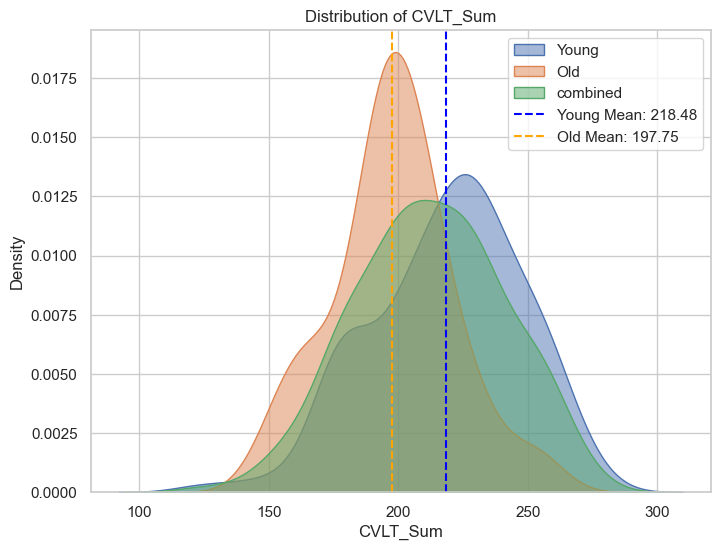

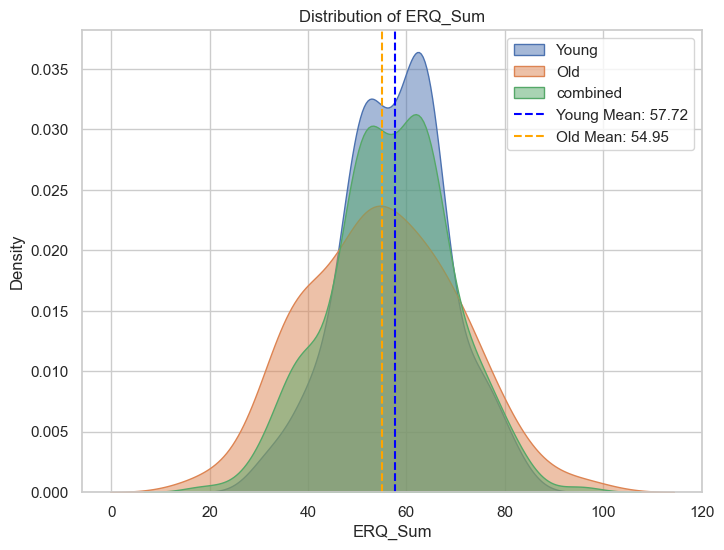

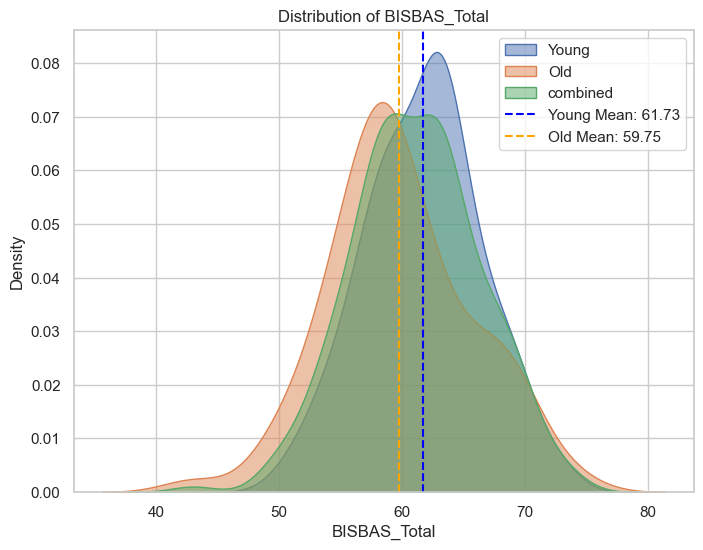

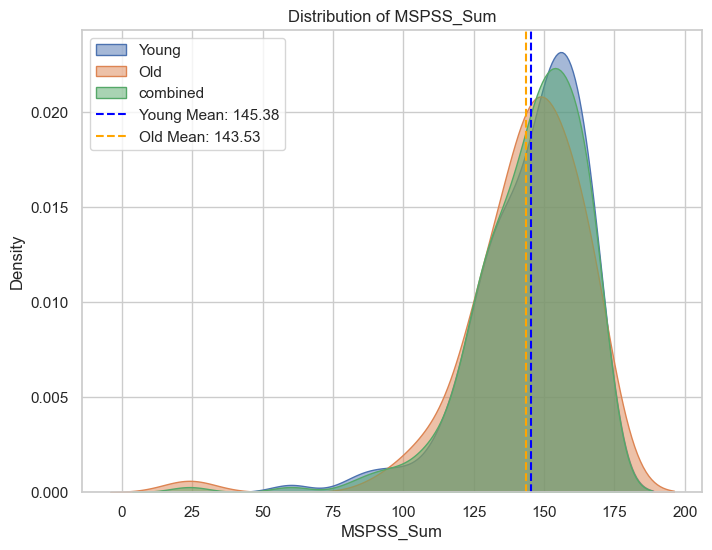

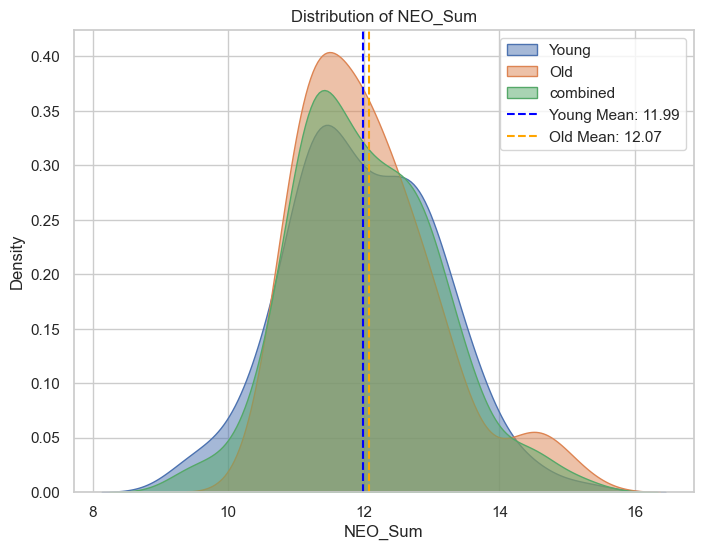

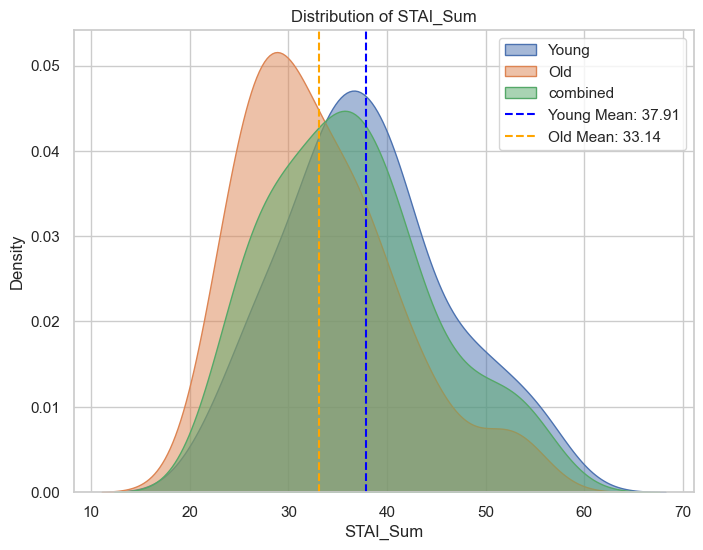

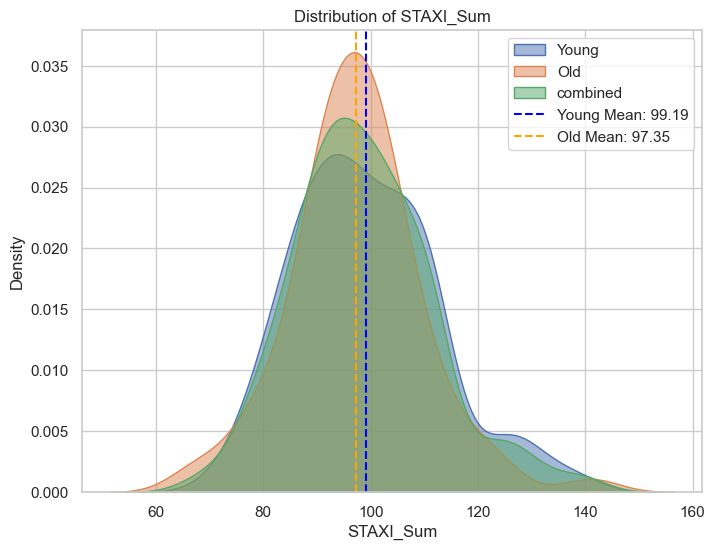

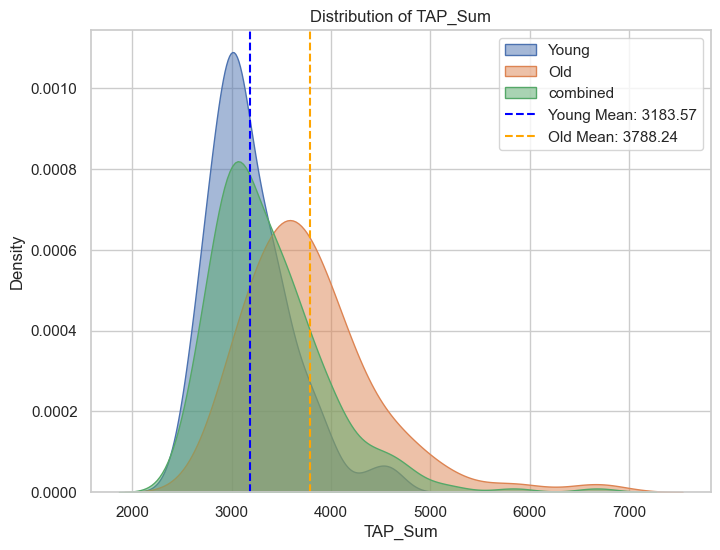

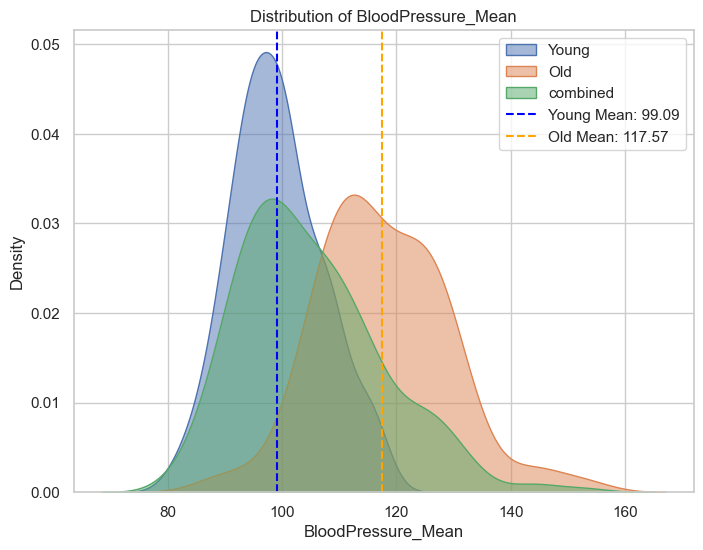

In [33]:

relevant_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total",
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", "BloodPressure_Mean",
]

for col in relevant_features:
    plt.figure(figsize=(8, 6))
    
    # Plot KDE for young dataset
    sns.kdeplot(data_relevant_features_young[col], label="Young", fill=True, alpha=0.5)
    
    # Plot KDE for old dataset
    sns.kdeplot(data_relevant_features_old[col], label="Old", fill=True, alpha=0.5)

    # Plot KDE for combined dataset
    sns.kdeplot(merged_data_clean[col], label="combined", fill=True, alpha=0.5)
    
    # Add vertical lines for the means
    plt.axvline(data_relevant_features_young[col].mean(), color='blue', linestyle='--', label=f"Young Mean: {data_relevant_features_young[col].mean():.2f}")
    plt.axvline(data_relevant_features_old[col].mean(), color='orange', linestyle='--', label=f"Old Mean: {data_relevant_features_old[col].mean():.2f}")
    
    # Add title and labels
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

In [34]:
from scipy.stats import ttest_ind

results = {}
for feature in relevant_features:
    stat, p_val = ttest_ind(data_relevant_features_young[feature], data_relevant_features_old[feature], equal_var=False)
    results[feature] = {'t-stat': stat, 'p-value': p_val}

# Display results
for col, res in results.items():
    print(f"Variable: {col}, t-stat: {res['t-stat']}, p-value: {res['p-value']:.4f}")



Variable: CVLT_Sum, t-stat: 5.76206499550668, p-value: 0.0000
Variable: ERQ_Sum, t-stat: 1.4073050764946846, p-value: 0.1623
Variable: BISBAS_Total, t-stat: 2.5241285133065534, p-value: 0.0130
Variable: MSPSS_Sum, t-stat: 0.6148739392573657, p-value: 0.5398
Variable: NEO_Sum, t-stat: -0.5402742500593585, p-value: 0.5898
Variable: STAI_Sum, t-stat: 4.179432002910656, p-value: 0.0000
Variable: STAXI_Sum, t-stat: 1.0295935426598157, p-value: 0.3048
Variable: TAP_Sum, t-stat: -6.994429110795461, p-value: 0.0000
Variable: BloodPressure_Mean, t-stat: -12.481131001297113, p-value: 0.0000


# Logistic Regression Model using K-fold Cross Validation.

In [35]:
#Data preparation
relevant_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total",
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", "BloodPressure_Mean",
]

x_train = merged_data_clean[relevant_features].values

y_train = merged_data_clean["Relationship_Status"].values


#normalize data 
#set up learning function 
#set up cross validation. 
# Train

# set hyperparameters
n_folds = 10
n_alphas = 10
max_iter = 5000

# define models

# INSERT YOUR CODE HERE

ridge_model = LogisticRegressionCV(penalty="l2", n_jobs = 16, max_iter=max_iter, fit_intercept=False, random_state=1, solver='saga', cv=n_folds, Cs=n_alphas)

# fit models

# INSERT YOUR CODE HERE
logreg_ridge_cv = ridge_model.fit(x_train, y_train)


In [36]:
print(logreg_ridge_cv.scores_[1])

[[0.65217391 0.60869565 0.60869565 0.60869565 0.60869565 0.60869565
  0.60869565 0.60869565 0.60869565 0.60869565]
 [0.69565217 0.7826087  0.7826087  0.7826087  0.7826087  0.7826087
  0.7826087  0.7826087  0.7826087  0.7826087 ]
 [0.69565217 0.69565217 0.69565217 0.69565217 0.69565217 0.69565217
  0.69565217 0.69565217 0.69565217 0.69565217]
 [0.65217391 0.65217391 0.60869565 0.65217391 0.65217391 0.65217391
  0.65217391 0.65217391 0.65217391 0.65217391]
 [0.69565217 0.73913043 0.69565217 0.69565217 0.69565217 0.69565217
  0.69565217 0.69565217 0.69565217 0.69565217]
 [0.73913043 0.73913043 0.73913043 0.73913043 0.73913043 0.73913043
  0.73913043 0.73913043 0.73913043 0.73913043]
 [0.7826087  0.73913043 0.73913043 0.73913043 0.73913043 0.73913043
  0.73913043 0.73913043 0.73913043 0.73913043]
 [0.68181818 0.72727273 0.72727273 0.77272727 0.77272727 0.77272727
  0.77272727 0.77272727 0.77272727 0.77272727]
 [0.72727273 0.68181818 0.63636364 0.63636364 0.63636364 0.63636364
  0.63636364 